In [ ]:
# https://docs.google.com/document/d/188X3fTkwNFHR6zgL39R-yQm1beWiVz6ne5ofDQCz__I/edit#

# “Why did I get the flu?”. Deep sequencing, error control, p-value, viral evolution...


## Install conda

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh 
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh 
!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local 

In [ ]:
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## Data loading

### Get SRR1705851 reads

In [ ]:
!mkdir raw_data

In [ ]:
!wget http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/001/SRR1705851/SRR1705851.fastq.gz -P raw_data
!gunzip raw_data/SRR1705851.fastq.gz
!mv raw_data/SRR1705851.fastq raw_data/roommate.fastq

--2022-12-19 16:37:02--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/001/SRR1705851/SRR1705851.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19217176 (18M) [application/x-gzip]
Saving to: ‘raw_data/SRR1705851.fastq.gz’

SRR1705851.fastq.gz 100%[===================>]  18.33M   314KB/s    in 52s     

2022-12-19 16:37:57 (359 KB/s) - ‘raw_data/SRR1705851.fastq.gz’ saved [19217176/19217176]



### Explore the data

In [ ]:
!head -20 raw_data/roommate.fastq

@SRR1705851.1 1/1
TTCGTGATTGTTTTCACTATCGTTCCGTTTGGCACTGCATGGTGCCCAAGGCACAGCGTTGCCGTGCTGTTGTCATTTCCAGGAAGTTTTTGAGCGAAAACCAGACATAGAATGTAGCTCAAAGCAATGATAGTCTTCATGGTTAATAG
+
,<==<<<<A@@@@@@@EEE;CEE+AC>EC;>EFFDC@=A@AE999DDD>>@E777EE75C>EF>EDEEFFFF--AE>EDEEEED=C-58AE=<D=<<DD=D9CDD@EEDED@DEDDE*9;@DDED@@@7@E*;*888@*8;@8@;;@@E
@SRR1705851.2 2/1
NATTAACCATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAACTTCCTGGAAATGACAACAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTGCCAAACGGAACGATAGTGAAAACAATCACGAATGA
+
#5<???BBEEEDEDDDGGGGGGIIIIIIIIIIIIIIIIIIIIIHIIIIFHHIIHHHHHIIIIHIIIIIIIHIIIIIIIIIIIIIIHHHHHHHHHHEHHHHHFFHHHHHHFFHHGFGGGGGGGGGGGGGEEEGCEEGGGGGEEGGGGCGEGG
@SRR1705851.3 3/1
GTTTGGCACTGCATGGTGCCCAAGGCACAGCGTTGCCGTGCTGTTGTCATTTCCAGGAAGTTTTTGAGCGAAAACCAGACATAGAATGTAGCTCAAAGCAATGATAGTCTTCATGGTTAATAG
+
9=9===>>@@@--5-588C;C;6+AE>6-A@+7>++-+@C+A.ECFE..8E.8--AE+C,EA@FEC5+-**55C-++++++++==D+5+,,+++++6CEDE====C=3C:@D+2++2<:DE2*
@SRR1705851.4 4/1
GTGCCCAAGGCACAGCGTTGCCGTGCTGTTGTCATTTCCAGGAAGTTTTTGAGCGAAAACCAGACATAGA

In [ ]:
!head -20 raw_data/reference.fasta

>KF848938.1 Influenza A virus (A/USA/RVD1_H3/2011(H3N2)) segment 4 hemagglutinin (HA) gene, partial cds
CAAAAACTTCCTGGAAATGACAACAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTGCCAAACGGAA
CAATAGTGAAAACAATCACGAATGACCAAATTGAAGTTACTAATGCCACTGAGCTGGTTCAGAGTTCCTC
AACAGGTGAAATATGCAACAGTCCTCATCAGATCCTTGATGGAGAAAACTGCACACTAATAGATGCTCTA
TTGGGAGACCCTCAGTGTGATGGCTTCCAAAACAAGAAATGGGACCTTTTTGTTGAACGAAGCAAAGCCC
ACAGCAACTGTTACCCTTATGATGTGCCGGATTATGCCTCCCTTAGGTCACTAGTTGCCTCATCCGGCAC
ACTGGAGTTTAACAATGAAAGCTTCAATTGGACTGGAGTCACTCAAAACGGAACAAGCTCTGCTTGCATA
AGGAGATCTAATAATAGTTTCTTTAGTAGATTGAATTGGTTGACCCACTTAAACTTCAAATACCCAGCAT
TGAACGTGACTATGCCAAACAATGAACAATTTGACAAATTGTACATTTGGGGGGTTCACCACCCGGGTAC
GGACAAGGACCAAATCTTCCTGTATGCTCAAGCAGCAGGAAGAATCACAGTATCTACCAAAAGAAGCCAA
CAAGCTGTAATTCCGAATATCGGATCTAGACCCAGAGTAAGGAATATCCCTAGCAGAGTAAGCATCTATT
GGACAATAGTAAAACCGGGAGACATACTTTTGATTAACAGCACAGGGAATCTAATTGCTCCTAGGGGTTA
CTTTAAAATACGAAGTGGGAAAAGCTCAATAATGAGATCAGATGCACCCATTGGCAAATGCAATTCTGCA
TGCATCACTCCAAATGGAAGCATTCCCAATGACAAACCATTCCA

In [ ]:
!wc -l raw_data/roommate.fastq

1433060 raw_data/roommate.fastq


1433060 roommate.fastq\
That means we have 358265 reads

In [ ]:
!conda install -c bioconda fastqc -y

In [ ]:
!mkdir fastqc_result

In [ ]:
!fastqc -o ./fastqc_result ./raw_data/roommate.fastq 

Started analysis of roommate.fastq
Approx 5% complete for roommate.fastq
Approx 10% complete for roommate.fastq
Approx 15% complete for roommate.fastq
Approx 20% complete for roommate.fastq
Approx 25% complete for roommate.fastq
Approx 30% complete for roommate.fastq
Approx 35% complete for roommate.fastq
Approx 40% complete for roommate.fastq
Approx 45% complete for roommate.fastq
Approx 50% complete for roommate.fastq
Approx 55% complete for roommate.fastq
Approx 60% complete for roommate.fastq
Approx 65% complete for roommate.fastq
Approx 70% complete for roommate.fastq
Approx 75% complete for roommate.fastq
Approx 80% complete for roommate.fastq
Approx 85% complete for roommate.fastq
Approx 90% complete for roommate.fastq
Approx 95% complete for roommate.fastq
Analysis complete for roommate.fastq


In [ ]:
!unzip fastqc_result/roommate_fastqc.zip

Archive:  fastqc_result/roommate_fastqc.zip
   creating: roommate_fastqc/
   creating: roommate_fastqc/Icons/
   creating: roommate_fastqc/Images/
  inflating: roommate_fastqc/Icons/fastqc_icon.png  
  inflating: roommate_fastqc/Icons/warning.png  
  inflating: roommate_fastqc/Icons/error.png  
  inflating: roommate_fastqc/Icons/tick.png  
  inflating: roommate_fastqc/summary.txt  
  inflating: roommate_fastqc/Images/per_base_quality.png  
  inflating: roommate_fastqc/Images/per_sequence_quality.png  
  inflating: roommate_fastqc/Images/per_base_sequence_content.png  
  inflating: roommate_fastqc/Images/per_sequence_gc_content.png  
  inflating: roommate_fastqc/Images/per_base_n_content.png  
  inflating: roommate_fastqc/Images/sequence_length_distribution.png  
  inflating: roommate_fastqc/Images/duplication_levels.png  
  inflating: roommate_fastqc/Images/adapter_content.png  
  inflating: roommate_fastqc/Images/kmer_profiles.png  
  inflating: roommate_fastqc/fastqc_report.html  
  

Open fastqc_report.html in folder. We can see that we have good quality of reads. 

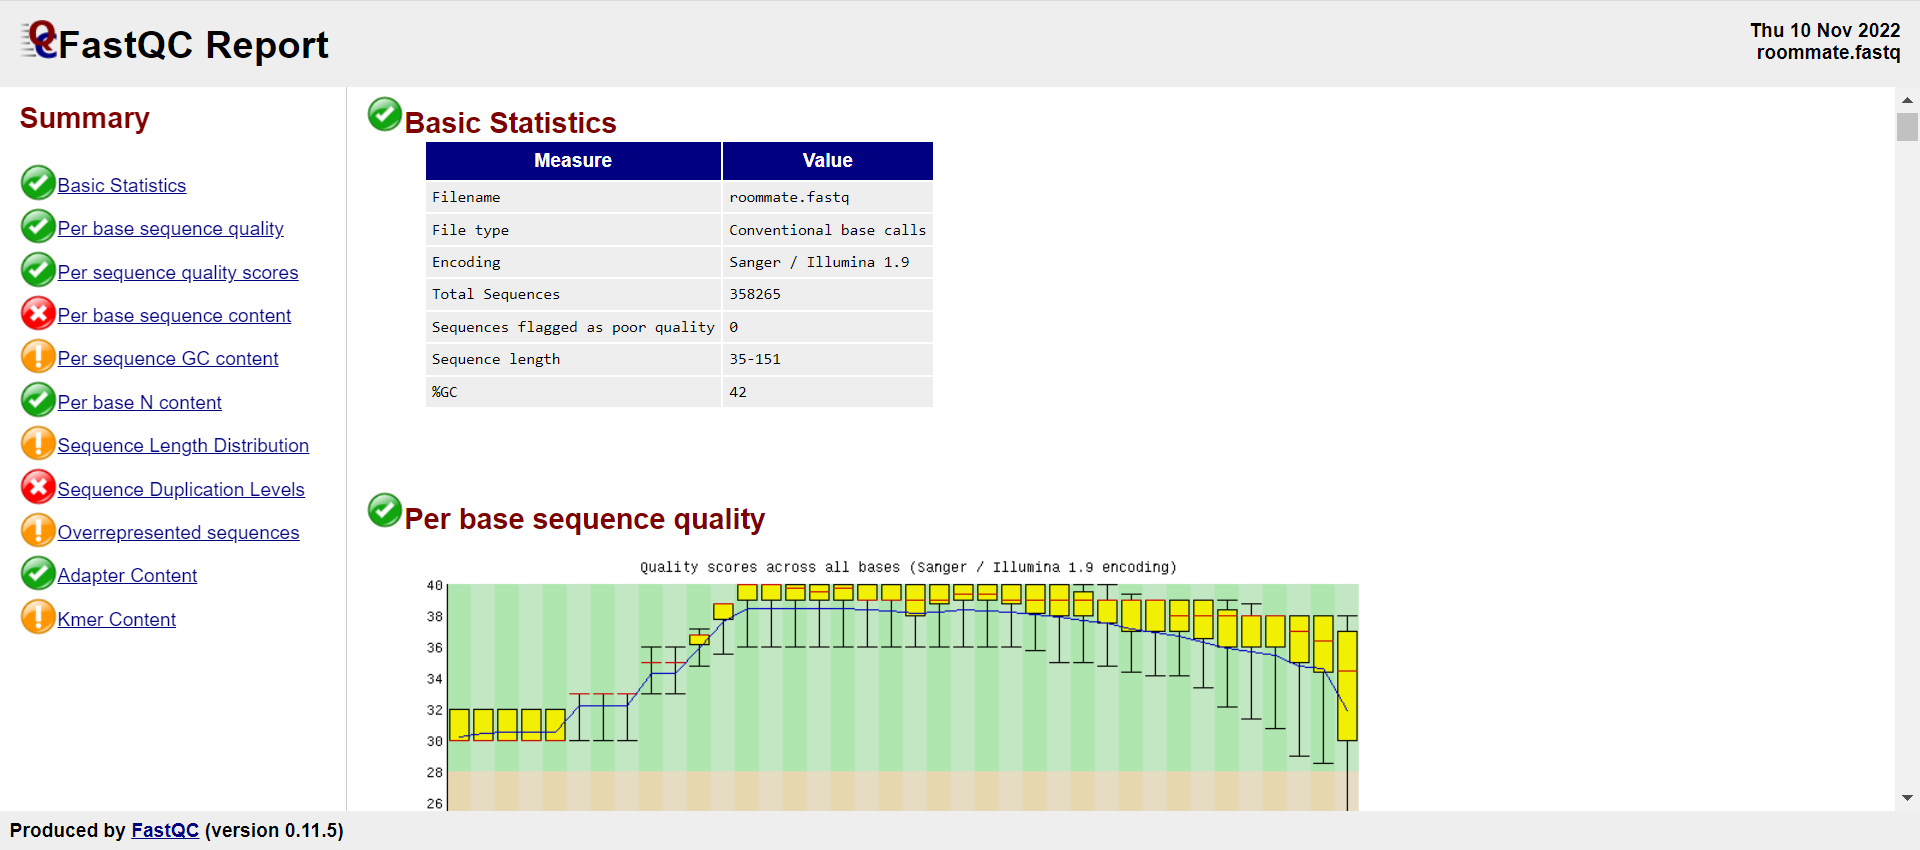

## Aligning sequences to reference

### Install bwa

In [ ]:
!conda install -c bioconda bwa -y

In [ ]:
!conda install -c bioconda samtools -y

### Index reference file

In [ ]:
!bwa index raw_data/reference.fasta

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa index raw_data/reference.fasta
[main] Real time: 0.046 sec; CPU: 0.015 sec


In [ ]:
!bwa mem raw_data/reference.fasta raw_data/roommate.fastq | samtools view -Sb - | samtools sort -o roommate_sorted.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68388 sequences (10000129 bp)...
[M::process] read 67628 sequences (10000233 bp)...
[M::mem_process_seqs] Processed 68388 reads in 2.261 CPU sec, 2.213 real sec
[M::process] read 67698 sequences (10000046 bp)...
[M::mem_process_seqs] Processed 67628 reads in 2.449 CPU sec, 2.421 real sec
[M::process] read 67652 sequences (10000169 bp)...
[M::mem_process_seqs] Processed 67698 reads in 2.810 CPU sec, 2.868 real sec
[M::process] read 68072 sequences (10000295 bp)...
[M::mem_process_seqs] Processed 67652 reads in 2.870 CPU sec, 2.816 real sec
[M::process] read 18827 sequences (2716992 bp)...
[M::mem_process_seqs] Processed 68072 reads in 2.419 CPU sec, 2.559 real sec
[M::mem_process_seqs] Processed 18827 reads in 1.426 CPU sec, 1.458 real sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa mem raw_data/reference.fasta raw_data/roommate.fastq
[main] Real time: 14.752 sec; CPU: 14.314 sec


## Look for common variants with VarScan

In [ ]:
!samtools flagstat roommate_sorted.bam

361349 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
3084 + 0 supplementary
0 + 0 duplicates
361116 + 0 mapped (99.94% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [ ]:
!samtools index roommate_sorted.bam 

In [ ]:
!mkdir variant_calling

In [ ]:
!samtools mpileup -d 32011 -f raw_data/reference.fasta roommate_sorted.bam >  variant_calling/var.mpileup

[fai_load] build FASTA index.
[mpileup] 1 samples in 1 input files


VarScan was taken from https://sourceforge.net/projects/varscan/files/ 

In [ ]:
!java -jar VarScan.v2.3.9.jar mpileup2snp  variant_calling/var.mpileup --min-var-freq 0.95 --variants --output-vcf 1 > variant_calling/VarScan_results.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.95
Min avg qual:	15
P-value thresh:	0.01
Reading input from variant_calling/var.mpileup
1665 bases in pileup file
5 variant positions (5 SNP, 0 indel)
0 were failed by the strand-filter
5 variant positions reported (5 SNP, 0 indel)


In [ ]:
!cat variant_calling/VarScan_results.vcf | awk 'NR>24 {print $1, $2, $4, $5}'

KF848938.1 72 A G
KF848938.1 117 C T
KF848938.1 774 T C
KF848938.1 999 C T
KF848938.1 1260 A C


### In IGV we have 5 SNP here

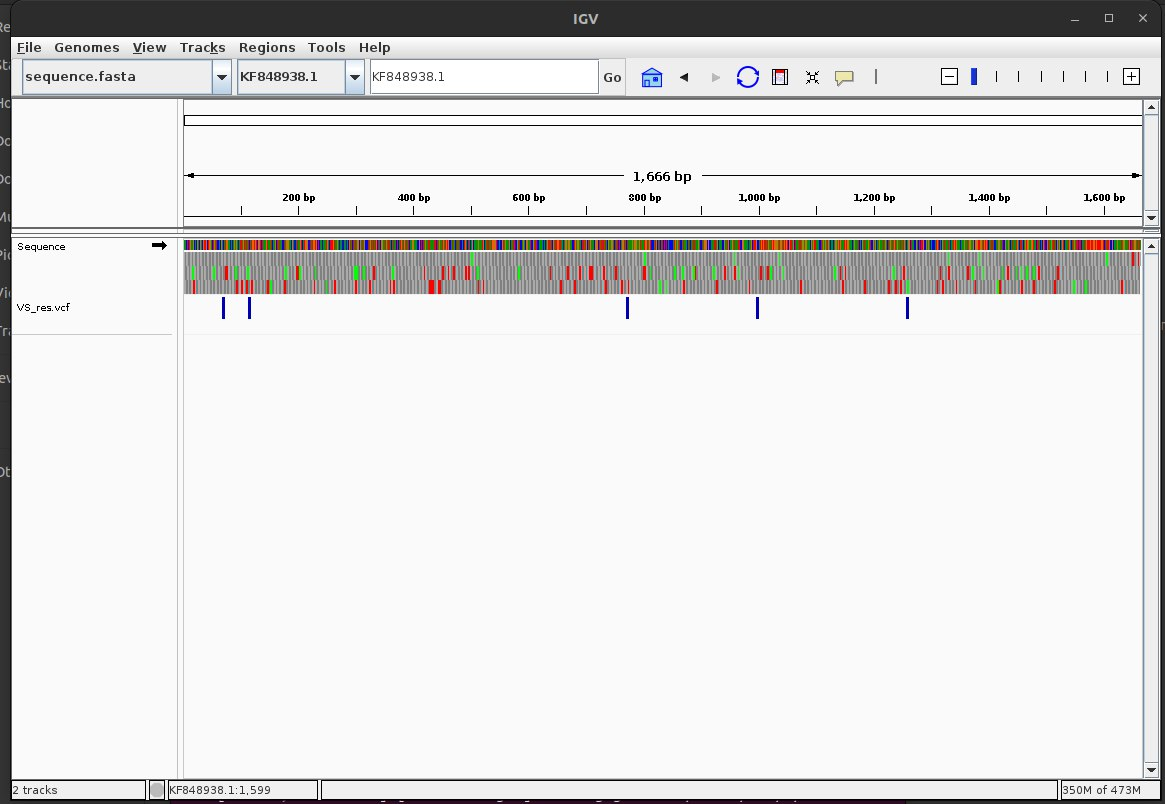

ACA (T) → ACG (T) no effect

GCC (A) → GCT (A) no effect

TTT (F) → TTC (F) no effect

GGC (G) → GGT (G) no effect

CTA (L) → CTC (L) no effect

## Look for rare variants with VarScan

In [ ]:
!java -jar VarScan.v2.3.9.jar mpileup2snp variant_calling/var.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > variant_calling/VS_rare_res.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Reading input from variant_calling/var.mpileup
1665 bases in pileup file
20 variant positions (18 SNP, 2 indel)
0 were failed by the strand-filter
18 variant positions reported (18 SNP, 0 indel)


In [ ]:
!awk 'BEGIN{FS=OFS="\t"}{gsub(":","\t",$10)}1' variant_calling/VS_rare_res.vcf | awk 'NR>24 {print $2, $4, $5, $16}'

72 A G 99.96%
117 C T 99.82%
254 A G 0.19%
307 C T 0.95%
340 T C 0.18%
389 T C 0.23%
722 A G 0.23%
744 A G 0.18%
774 T C 99.97%
802 A G 0.24%
915 T C 0.2%
999 C T 99.86%
1043 A G 0.19%
1086 A G 0.21%
1213 A G 0.22%
1260 A C 99.94%
1280 T C 0.18%
1458 T C 0.83%


## Inspect and align the control sample sequencing data

Control references (from sequencing of isogenic reference samples)

In [ ]:
!mkdir controls

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/008/SRR1705858/SRR1705858.fastq.gz -P controls
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/009/SRR1705859/SRR1705859.fastq.gz -P controls
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/000/SRR1705860/SRR1705860.fastq.gz -P controls

In [ ]:
!gzip -d controls/SRR1705858.fastq.gz
!gzip -d controls/SRR1705859.fastq.gz
!gzip -d controls/SRR1705860.fastq.gz

In [ ]:
!cat controls/SRR1705858.fastq | wc -l

1026344


256586 reads

In [ ]:
!cat controls/SRR1705859.fastq | wc -l

933308


233327 reads

In [ ]:
!cat controls/SRR1705860.fastq | wc -l

999856


249964 reads

In [ ]:
!fastqc -o . controls/SRR1705858.fastq controls/SRR1705859.fastq controls/SRR1705860.fastq

Started analysis of SRR1705858.fastq
Approx 5% complete for SRR1705858.fastq
Approx 10% complete for SRR1705858.fastq
Approx 15% complete for SRR1705858.fastq
Approx 20% complete for SRR1705858.fastq
Approx 25% complete for SRR1705858.fastq
Approx 30% complete for SRR1705858.fastq
Approx 35% complete for SRR1705858.fastq
Approx 40% complete for SRR1705858.fastq
Approx 45% complete for SRR1705858.fastq
Approx 50% complete for SRR1705858.fastq
Approx 55% complete for SRR1705858.fastq
Approx 60% complete for SRR1705858.fastq
Approx 65% complete for SRR1705858.fastq
Approx 70% complete for SRR1705858.fastq
Approx 75% complete for SRR1705858.fastq
Approx 80% complete for SRR1705858.fastq
Approx 85% complete for SRR1705858.fastq
Approx 90% complete for SRR1705858.fastq
Approx 95% complete for SRR1705858.fastq
Analysis complete for SRR1705858.fastq
Started analysis of SRR1705859.fastq
Approx 5% complete for SRR1705859.fastq
Approx 10% complete for SRR1705859.fastq
Approx 15% complete for SRR1

In [ ]:
!unzip SRR1705860_fastqc.zip
!unzip SRR1705859_fastqc.zip
!unzip SRR1705858_fastqc.zip

#### FastQC controls results

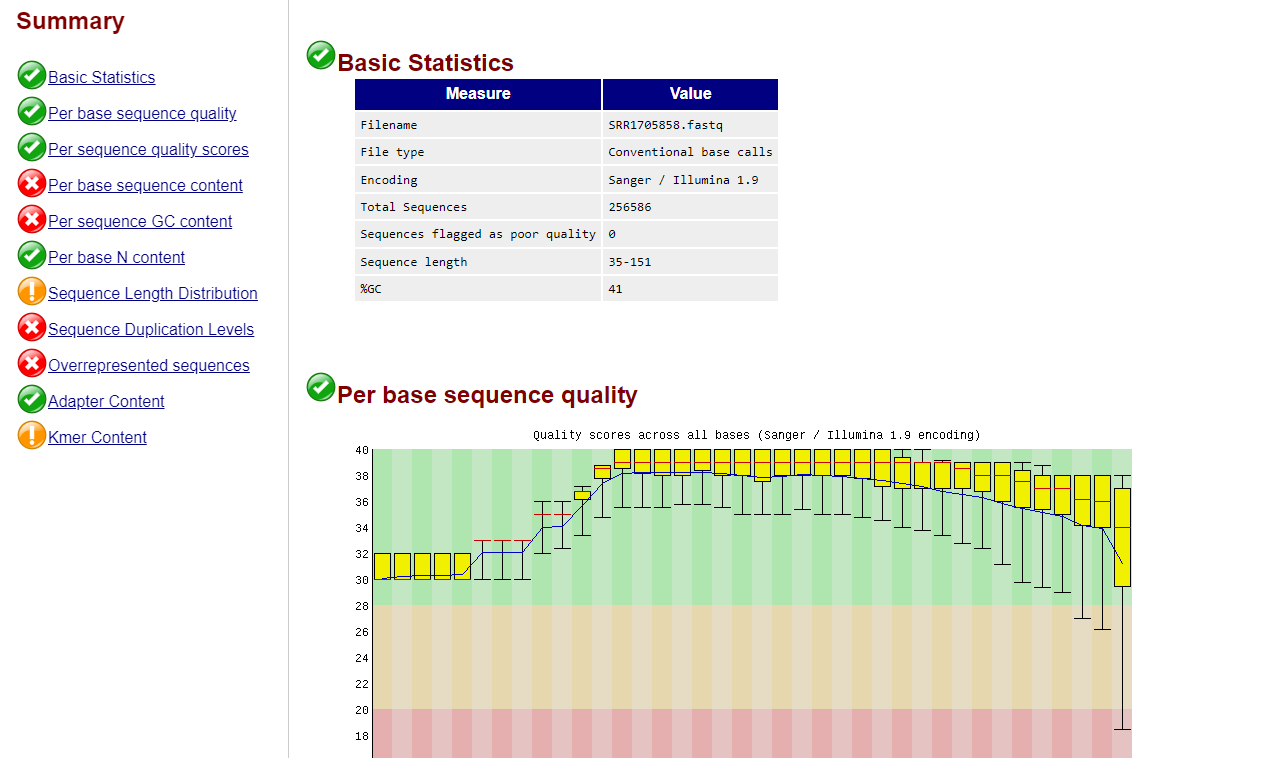

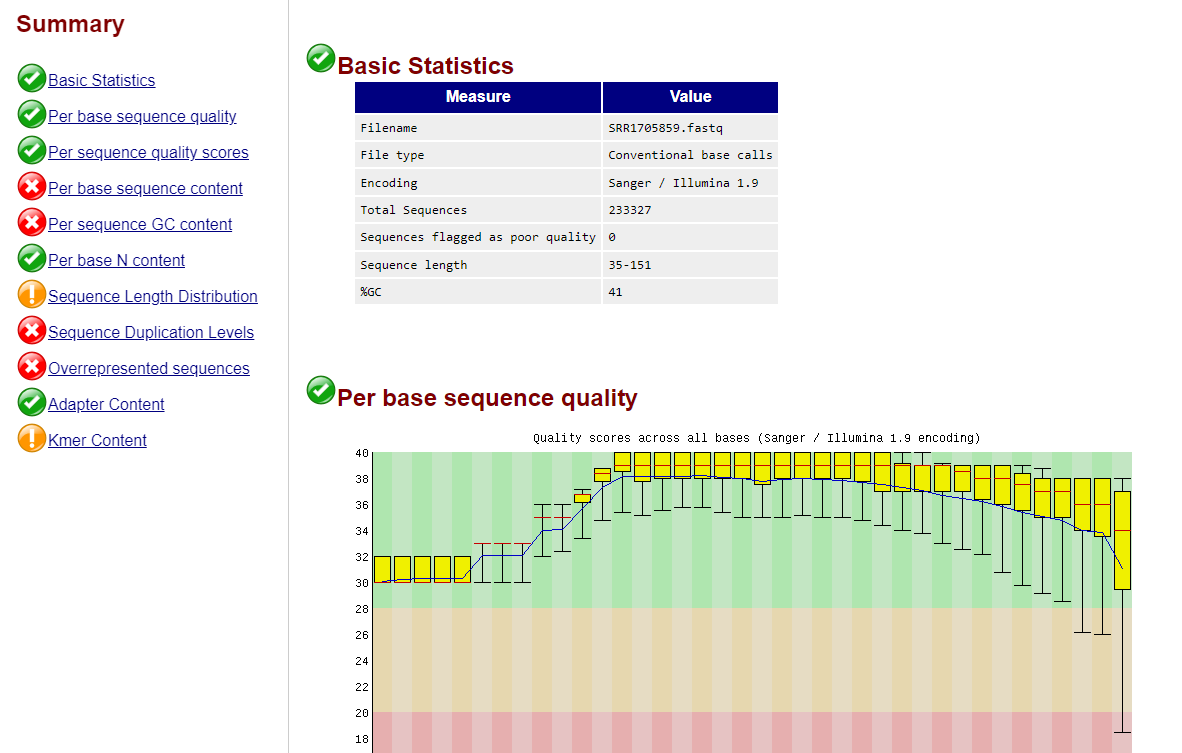

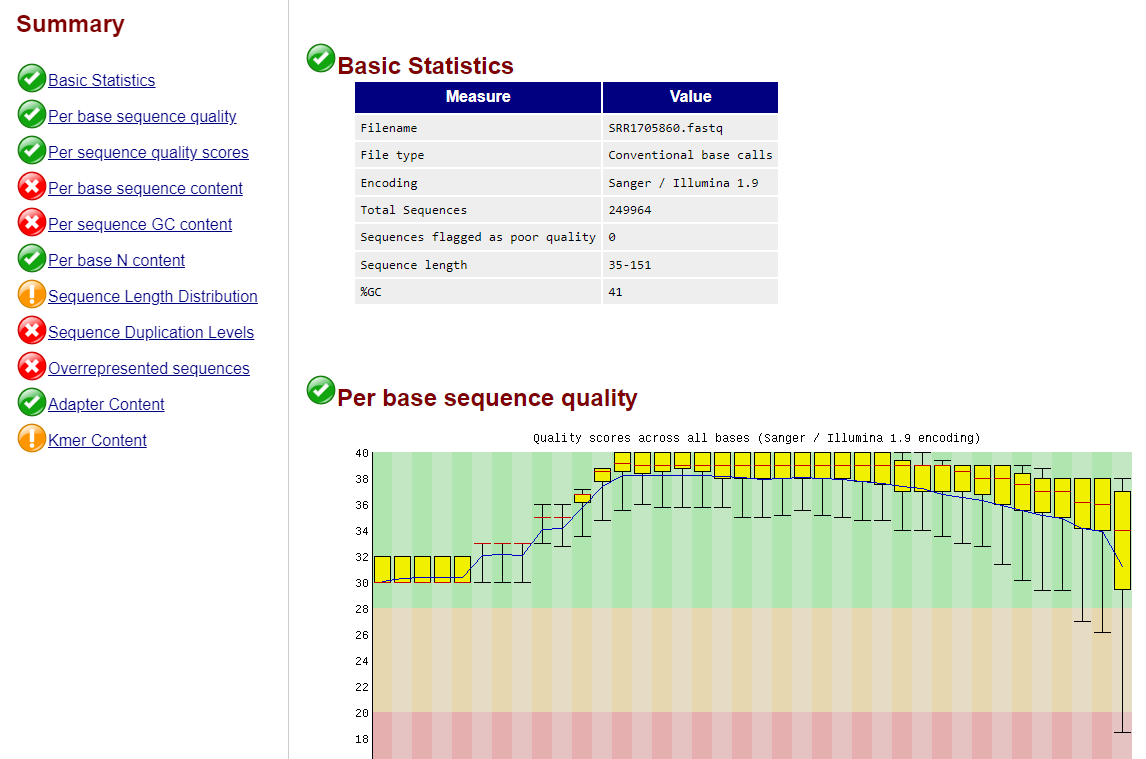

#### Coverage

Max estimated coverage: 257000 / (1665 / 151) = 23308

In [ ]:
!bwa mem raw_data/reference.fasta controls/SRR1705860.fastq | samtools view -Sb - | samtools sort -o SRR1705860_sorted.bam
!bwa mem raw_data/reference.fasta controls/SRR1705859.fastq | samtools view -Sb - | samtools sort -o SRR1705859_sorted.bam
!bwa mem raw_data/reference.fasta controls/SRR1705858.fastq | samtools view -Sb - | samtools sort -o SRR1705858_sorted.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 67356 sequences (10000126 bp)...
[M::process] read 67208 sequences (10000122 bp)...
[M::mem_process_seqs] Processed 67356 reads in 1.586 CPU sec, 1.511 real sec
[M::process] read 67010 sequences (10000072 bp)...
[M::mem_process_seqs] Processed 67208 reads in 2.367 CPU sec, 2.603 real sec
[M::process] read 48390 sequences (7170166 bp)...
[M::mem_process_seqs] Processed 67010 reads in 2.204 CPU sec, 2.281 real sec
[M::mem_process_seqs] Processed 48390 reads in 1.934 CPU sec, 1.921 real sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa mem raw_data/reference.fasta controls/SRR1705860.fastq
[main] Real time: 9.153 sec; CPU: 8.206 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 67476 sequences (10000274 bp)...
[M::process] read 67236 sequences (10000039 bp)...
[M::mem_process_seqs] Processed 67476 reads in 1.766 CPU sec, 1.758 real sec
[M::process] read 67216 sequences (10000283 bp)...
[M::mem_process_seqs]

In [ ]:
!samtools index SRR1705860_sorted.bam
!samtools index SRR1705859_sorted.bam 
!samtools index SRR1705858_sorted.bam

In [ ]:
!samtools mpileup -d 35000 -f raw_data/reference.fasta SRR1705860_sorted.bam > SRR1705860_sorted.mpileup
!samtools mpileup -d 35000 -f raw_data/reference.fasta SRR1705859_sorted.bam > SRR1705858_sorted.mpileup
!samtools mpileup -d 35000 -f raw_data/reference.fasta SRR1705858_sorted.bam > SRR1705858_sorted.mpileup

[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files


## Use VarScan to look for rare variants in the reference files

Run VarScan with a minimum variant frequency of 0.001 (0.1%) on each of the reference
alignments.


In [ ]:
!java -jar VarScan.v2.3.9.jar mpileup2snp SRR1705860_sorted.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > variant_calling/VarScan_results_SRR1705860.vcf
!java -jar VarScan.v2.3.9.jar mpileup2snp SRR1705859_sorted.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > variant_calling/VarScan_results_SRR1705859.vcf
!java -jar VarScan.v2.3.9.jar mpileup2snp SRR1705858_sorted.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > variant_calling/VarScan_results_SRR1705858.vcf

Input stream not ready, waiting for 5 seconds...
Input stream not ready, waiting for 5 seconds...
Input stream not ready, waiting for 5 seconds...
Input stream not ready, waiting for 5 seconds...
Input stream not ready, waiting for 5 seconds...
ERROR: Gave up waiting after 500 seconds...

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Reading input from SRR1705858_sorted.mpileup
1665 bases in pileup file
58 variant positions (58 SNP, 0 indel)
1 were failed by the strand-filter
57 variant positions reported (57 SNP, 0 indel)


In [ ]:
!cat variant_calling/VarScan_results_SRR1705860.vcf | awk 'FNR==1 {print "position,reference_base,alternative_base,frequency";next} NR>24 {gsub(",", ".", $10); split($10,a,":"); print $2, $4, $5, a[7]}' OFS=, > VarScan_results_SRR1705860.csv

In [ ]:
!cat variant_calling/VarScan_results_SRR1705859.vcf | awk 'FNR==1 {print "position,reference_base,alternative_base,frequency";next} NR>24 {gsub(",", ".", $10); split($10,a,":"); print $2, $4, $5, a[7]}' OFS=, > VarScan_results_SRR1705859.csv

In [ ]:
!cat variant_calling/VarScan_results_SRR1705858.vcf | awk 'FNR==1 {print "position,reference_base,alternative_base,frequency";next} NR>24 {gsub(",", ".", $10); split($10,a,":"); print $2, $4, $5, a[7]}' OFS=, > VarScan_results_SRR1705858.csv